In [ ]:
# #importing the required libraries
# import cv2
# import face_recognition

# #capture the video from default camera 
# webcam_video_stream = cv2.VideoCapture('images/testing/modi.mp4')

# #load the sample images and get the 128 face embeddings from them
# modi_image = face_recognition.load_image_file('images/samples/modi.jpg')
# modi_face_encodings = face_recognition.face_encodings(modi_image)[0]

# trump_image = face_recognition.load_image_file('images/samples/trump.jpg')
# trump_face_encodings = face_recognition.face_encodings(trump_image)[0]

# abhi_image = face_recognition.load_image_file('images/samples/abhi.jpg')
# abhi_face_encodings = face_recognition.face_encodings(abhi_image)[0]

# #save the encodings and the corresponding labels in seperate arrays in the same order
# known_face_encodings = [modi_face_encodings, trump_face_encodings, abhi_face_encodings]
# known_face_names = ["Narendra Modi", "Donald Trump", "Abhilash"]


# #initialize the array variable to hold all face locations, encodings and names 
# all_face_locations = []
# all_face_encodings = []
# all_face_names = []

# #loop through every frame in the video
# while True:
#     #get the current frame from the video stream as an image
#     ret,current_frame = webcam_video_stream.read()
#     #resize the current frame to 1/4 size to proces faster
#     current_frame_small = cv2.resize(current_frame,(0,0),fx=0.25,fy=0.25)
#     #detect all faces in the image
#     #arguments are image,no_of_times_to_upsample, model
#     all_face_locations = face_recognition.face_locations(current_frame_small,number_of_times_to_upsample=1,model='hog')
    
#     #detect face encodings for all the faces detected
#     all_face_encodings = face_recognition.face_encodings(current_frame_small,all_face_locations)


#     #looping through the face locations and the face embeddings
#     for current_face_location,current_face_encoding in zip(all_face_locations,all_face_encodings):
#         #splitting the tuple to get the four position values of current face
#         top_pos,right_pos,bottom_pos,left_pos = current_face_location
        
#         #change the position maginitude to fit the actual size video frame
#         top_pos = top_pos*4
#         right_pos = right_pos*4
#         bottom_pos = bottom_pos*4
#         left_pos = left_pos*4
        
#         #find all the matches and get the list of matches
#         all_matches = face_recognition.compare_faces(known_face_encodings, current_face_encoding)
       
#         #string to hold the label
#         name_of_person = 'Unknown face'
        
#         #check if the all_matches have at least one item
#         #if yes, get the index number of face that is located in the first index of all_matches
#         #get the name corresponding to the index number and save it in name_of_person
#         if True in all_matches:
#             first_match_index = all_matches.index(True)
#             name_of_person = known_face_names[first_match_index]
        
#         #draw rectangle around the face    
#         cv2.rectangle(current_frame,(left_pos,top_pos),(right_pos,bottom_pos),(255,0,0),2)
        
#         #display the name as text in the image
#         font = cv2.FONT_HERSHEY_DUPLEX
#         cv2.putText(current_frame, name_of_person, (left_pos,bottom_pos), font, 0.5, (255,255,255),1)
    
#     #display the video
#     cv2.imshow("Webcam Video",current_frame)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# #release the stream and cam
# #close all opencv windows open
# webcam_video_stream.release()
# cv2.destroyAllWindows()        












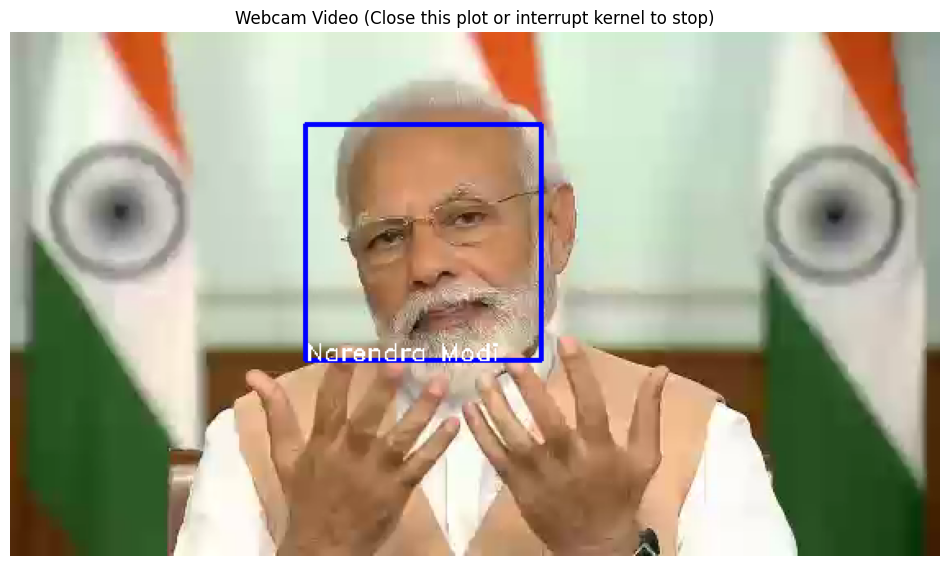

Video processing completed!


In [1]:
#importing the required libraries
import cv2
import face_recognition
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

%matplotlib inline

#capture the video from default camera 
webcam_video_stream = cv2.VideoCapture('images/testing/modi.mp4')

#load the sample images and get the 128 face embeddings from them
modi_image = face_recognition.load_image_file('images/samples/modi.jpg')
modi_face_encodings = face_recognition.face_encodings(modi_image)[0]

trump_image = face_recognition.load_image_file('images/samples/trump.jpg')
trump_face_encodings = face_recognition.face_encodings(trump_image)[0]

abhi_image = face_recognition.load_image_file('images/samples/abhi.jpg')
abhi_face_encodings = face_recognition.face_encodings(abhi_image)[0]

#save the encodings and the corresponding labels in seperate arrays in the same order
known_face_encodings = [modi_face_encodings, trump_face_encodings, abhi_face_encodings]
known_face_names = ["Narendra Modi", "Donald Trump", "Abhilash"]


#initialize the array variable to hold all face locations, encodings and names 
all_face_locations = []
all_face_encodings = []
all_face_names = []

#create figure for displaying video
fig, ax = plt.subplots(figsize=(12, 8))

#loop through every frame in the video
while True:
    #get the current frame from the video stream as an image
    ret,current_frame = webcam_video_stream.read()
    
    #break if no frame returned (end of video)
    if not ret:
        break
    
    #resize the current frame to 1/4 size to proces faster
    current_frame_small = cv2.resize(current_frame,(0,0),fx=0.25,fy=0.25)
    #detect all faces in the image
    #arguments are image,no_of_times_to_upsample, model
    all_face_locations = face_recognition.face_locations(current_frame_small,number_of_times_to_upsample=1,model='hog')
    
    #detect face encodings for all the faces detected
    all_face_encodings = face_recognition.face_encodings(current_frame_small,all_face_locations)


    #looping through the face locations and the face embeddings
    for current_face_location,current_face_encoding in zip(all_face_locations,all_face_encodings):
        #splitting the tuple to get the four position values of current face
        top_pos,right_pos,bottom_pos,left_pos = current_face_location
        
        #change the position maginitude to fit the actual size video frame
        top_pos = top_pos*4
        right_pos = right_pos*4
        bottom_pos = bottom_pos*4
        left_pos = left_pos*4
        
        #find all the matches and get the list of matches
        all_matches = face_recognition.compare_faces(known_face_encodings, current_face_encoding)
       
        #string to hold the label
        name_of_person = 'Unknown face'
        
        #check if the all_matches have at least one item
        #if yes, get the index number of face that is located in the first index of all_matches
        #get the name corresponding to the index number and save it in name_of_person
        if True in all_matches:
            first_match_index = all_matches.index(True)
            name_of_person = known_face_names[first_match_index]
        
        #draw rectangle around the face    
        cv2.rectangle(current_frame,(left_pos,top_pos),(right_pos,bottom_pos),(255,0,0),2)
        
        #display the name as text in the image
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(current_frame, name_of_person, (left_pos,bottom_pos), font, 0.5, (255,255,255),1)
    
    #display the video in Jupyter
    current_frame_rgb = cv2.cvtColor(current_frame, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(current_frame_rgb)
    ax.set_title("Webcam Video (Close this plot or interrupt kernel to stop)")
    ax.axis('off')
    clear_output(wait=True)
    display(fig)

#release the stream and cam
webcam_video_stream.release()
plt.close()
print("Video processing completed!")